<a href="https://colab.research.google.com/github/bridget-mullen/Analysis_Projects/blob/main/stastical_analysis_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Poisson Distribution Hypothesis Chi Square Test

The file gamma-ray.csv contains a small quantity of data collected from the Compton Gamma Ray Observatory, a satellite launched by NASA in 1991 (http://cossc.gsfc.nasa.gov/). For each of 100 sequential time intervals of variable lengths (given in seconds), the number of gamma rays originating in a particular area of the sky was recorded. I would like to check the assumption that the emission rate is constant.

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pandas import read_csv
import scipy

# opening the CSV file
with open('gamma-ray.csv', mode ='r')as file:

  # reading the CSV file
  csvFile = csv.reader(file)

d = read_csv('gamma-ray.csv')

print(d)

    seconds  count
0     116.0    0.0
1     112.0    0.0
2     160.0    0.0
3      51.5    0.0
4     102.0    1.0
..      ...    ...
95     38.7    1.0
96     41.8    0.0
97     81.7    0.0
98     88.3    0.0
99     37.4    0.0

[100 rows x 2 columns]


In [ ]:

seconds = np.array(d['seconds'])
count = np.array(d['count'], int)

#calculate lambda under null hypothesis that all lambda are ==
lambda_0 = count.sum()/seconds.sum()

print(lambda_0)

0.0038808514969907496


In [ ]:


#calculate log likelihoods for the mle under the null (first)
first = np.log(np.power(lambda_0, count)*np.exp(-lambda_0))

#calculate log likelihood for the mle ( with all different lambdas)
second = np.log(np.power(count/seconds, count)*np.exp(-count/seconds))
print(second)

# calculate test statistic for the loglikelihood test ratio, l
print(first.sum(), second.sum())
l = -2*(first.sum() - second.sum())
print(l)



[  0.           0.           0.           0.          -4.63477673
   0.           0.         -17.63320865  -4.60622026   0.
   0.           0.           0.           0.           0.
   0.          -7.92171821  -6.51657259   0.         -10.13151918
 -20.58998214   0.           0.           0.          -3.91621883
   0.           0.           0.           0.           0.
  -4.68217463   0.           0.          -4.65400628 -24.39123633
  -4.71853921 -10.68467425  -5.01065772  -4.05193975   0.
  -4.62502151   0.          -4.73623738   0.           0.
   0.           0.          -4.65400628   0.           0.
   0.          -6.76734379   0.           0.          -7.90258109
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  -4.63477673   0.           0.           0.           0.
  -7.81813896   0.          -3.96290152   0.         -18.19368121
   0.          -4.5020918   -3.98545058   0.           0.
   0.           0.      

In [ ]:
#find the p value with chi2 test with 99 degrees of freedom
p_val = scipy.stats.chi2.sf(l, 99)
print(p_val)

0.33739854643392514


#Distinguishing genetic markers for tumor samples


The data set golub consists of the expression levels of 3051 genes for 38 tumor mRNA samples. Each tumor mRNA sample comes from one patient (i.e. 38 patients total), and 27 of these tumor samples correspond to acute lymphoblastic leukemia (ALL) and the remaining 11 to acute myeloid leukemia (AML).

Lets discover how many genes can be used to differentiate the tumor types (meaning that their expression level differs between the two tumor types) using

the uncorrected p-values,

the Holm-Bonferroni correction, and (iii) the Benjamini-Hochberg correction.



In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pandas import read_csv
import scipy

golub_data = read_csv('golub.csv')
golub_classnames = read_csv('golub_gnames.csv')

sample varience = s^2/N

use welch test statistic:
(X̄_ALL-X̄_AML)\^2
/sqrt(s_ALL^2/N_ALL+s_AML^2/N_AML)


v = (s_ALL^2/N_ALL+s_AML^2/N_AML)^2
/((1/N_ALL-1)*(s_ALL^2)^2+1/N_AML-1)(s_AML^2)^2



In [ ]:
#divide data into two sets, ALL tumor, AML tumor

golub_data.head
x_ALL= np.array(golub_data.iloc[:, 1:27])
x_AML = np.array(golub_data.iloc[:, 28:])
print(x_ALL)

#find X_bar of each set
X_bar_ALL = x_ALL.sum(axis = 1)/27
X_bar_AML = x_AML.sum(axis = 1)/11

#find sample varience for each set
var_ALL=np.var(x_ALL, axis = 1, ddof = 1)/27
var_AML=np.var(x_AML, axis = 1, ddof = 1)/11
print(var_ALL)

#calculate welch test statistic
t_welch = (X_bar_ALL-X_bar_AML)/np.sqrt(var_ALL+var_AML)
print(t_welch)

#calculate degrees of freedom for each t-test
v= np.power((var_ALL+var_AML), 2)/(np.power(var_ALL, 2)/26+(np.power(var_AML, 2)/10))
print(v)

#calculate p values for each test
pvals = scipy.stats.t.sf(np.abs(t_welch),v)*2
print(pvals)

count = 0
for i in pvals:
  if i<= .05:
    count+=1
print(count)
print(pvals.shape)


[[-1.45769 -1.3942  -1.42779 ... -1.48332 -1.25268 -1.27619]
 [-0.75161 -1.26278 -0.09052 ... -1.12185 -0.65264 -1.27619]
 [ 0.45695 -0.09654  0.90325 ...  0.28577  0.61937  0.20085]
 ...
 [ 0.45231  0.42686  0.67579 ...  0.26707  0.91343  0.68704]
 [-0.3592  -0.43633  0.34031 ... -0.20401 -1.25268 -0.22244]
 [-0.86079 -1.3942  -0.73766 ... -0.81902  0.68359 -0.93305]]
[0.00399872 0.00631413 0.00824831 ... 0.00830277 0.00938944 0.01131166]
[-1.59478617 -0.71896513  0.04454437 ... -1.93498086 -0.24180378
 -3.2264149 ]
[11.09069491 12.54943421 15.18619141 ... 21.70472582 22.76262602
 12.34445204]
[0.13883916 0.48533522 0.96505094 ... 0.06613058 0.81109733 0.00703009]
1094
(3051,)


Now, lets find the number of significantly associated genes using the Holm-Bonferroni and Benjamini-Hochberg corrections to the p-values.

Holm-Bonferroni:
sort p values in increasing order(1 to n), reject H_0 when
(n-i+1)*p_i<= alpha
stop test at first rejection

Benjamini-Hochberg:
sort p values in increasing order(1 to n), reject H_0 when
n*p_i/i<= alpha


In [ ]:
#Holm-Bonferroni
count = 0
sorted_p = np.sort(pvals)
i=1
for p in sorted_p:
  if (3051-i+1)*p<= .05:
    count+=1
  i+=1
print(count)

108


In [ ]:
#Benjamini-Hochberg
count = 0
sorted_p = np.sort(pvals)
i=1
for p in sorted_p:
  if 3051*p/i<= .05:
    count+=1
  i+=1
print(count)

738


## Computing OLS estimators by matrix inversion


Lets read in the synthetic data matrix syn_X.csv and the vector syn_y.csv of “observations".  Compute the closed form OLS estimator  by matrix inversion.



In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pandas import read_csv
import scipy

# find the closed form ols estimator beta
def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

d_X = read_csv('syn_X.csv')
d_Y = read_csv('syn_y.csv')
x = np.array(d_X)
x = add_intercept(x)
y = np.array(d_Y)
b= np.linalg.inv(x.T@x)@x.T@y
print(b)


[[ 1.92739312]
 [ 1.26343191]
 [-4.59990074]]


In [ ]:
# now lets write and run gradient descent on data


def gradient_descent(X, y, step_size, precision):
  b = np.zeros((X.shape[1], 1))
  print(b)
  e = 1
  count = 0
  while e >= precision:
    grad = 2*(X.T).dot(y-X@b)
    b_1 = b + step_size*grad
    e = np.max(b - b_1)
    b= b_1
    count += 1
 # print("iterations:", count)
  return(b)


b = gradient_descent(x, y, .005, .000001)

print(b)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.83820878e+04 1.98975278e+04 1.91892590e+04 1.95868626e+04
  2.13615226e+04 2.05457772e+04 1.86379180e+04 1.79366282e+04
  1.99778860e+04 1.81922590e+04 2.02911434e+04 2.04363066e+04
  1.93511718e+04 1.96598430e+04 1.91192696e+04 1.71503940e+04
  1.86684262e+04 1.73830938e+04 1.91268468e+04 1.87671292e+04
  1.73745196e+04 1.93641328e+04 1.76961518e+04 1.89934482e+04
  1.93152798e+04 1.83394162e+04 1.68303570e+04 1.71735244e+04
  1.97258444e+04 2.00694106e+04 1.71771136e+04 1.85272510e+04
  1.71009428e+04 1.91625394e+04 1.84092062e+04 2.21964104e+04
  1.98333210e+04 2.02394988e+04 1.97663226e+04 1.78261606e+04
  1.87136900e+04 1.88670286e+04 2.04484700e+04 1.74331432e+04
  1.90139864e+04 1.67438174e+04 1.81792980e+04 1.57671562e+04
  1.79312444e+04 1.80289504e+04 1.89563598e+04 1.93908524e+04
  1.81892680e+04 1.92979320e+04 1.64257744e+04 2.00097900e+04
  1.78602580e+04 1.81816908e+04 1.90315336e+04]

## General Motors collected data
 Here is a study of the contribution of air pollution to mortality from 59 US cities. The dependent variable is the age adjusted mortality (Mortality). The data includes variables measuring climate characteristics (JanTemp, JulyTemp, RelHum, Rain), variables measuring demographic characteristics of the cities (Educ, Dens, NonWhite, WhiteCollar, Pop, House, Income), and variables recording the pollution potential of three different air pollutants (HC, NOx, SO2).

 Lets find a closed form solution and run gradient descent on this data



In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pandas import read_csv
import scipy

In [ ]:
def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

d_m = read_csv("mortality.csv")
y = np.array(d_m['Mortality'])
x = np.array(d_m.iloc[:,2:])
x.shape

#find closed form solution
b= np.linalg.inv(x.T@x)@x.T@y
print(b)

#try gradient descent but it will not converge
x = add_intercept(x)
x.shape
def gradient_descent(X, y, step_size, precision):
  b = np.zeros((X.shape[1]))
  e = 1
  count = 0
  while e >= precision:
    grad = 2*(X.T).dot(y-X@b)
    #print(grad, "grad")
    b_1 = b + step_size*grad
    #print(b-b_1)
    e = np.max(b - b_1)
    #print(e, "e")
    b= b_1
    count += 1
  print("iterations:", count)
  return(b)

b = gradient_descent(x, y, .0000000000005, .000001)

print(b)


[-1.28732266e+00  3.70814172e+00  3.46507832e+00  1.78240070e+00
  8.94890348e+00  1.04772659e-02  2.55419856e+00 -1.66191454e+00
 -3.79301064e-09  1.04901298e+02 -4.19662388e-04 -3.90559344e-01
  1.11365719e+00  1.85815728e-01]
iterations: 1
[5.55292100e-08 1.87611277e-06 4.13711151e-06 3.20460762e-06
 2.15649301e-06 6.07374139e-07 2.18462463e-04 6.80541663e-07
 2.57049160e-06 8.01802318e-02 1.80525420e-07 1.84157295e-03
 2.07445995e-06 1.26100166e-06 3.13171581e-06]


In [ ]:
#try rescaling (normalizing) data by (x-mean)/sd

x = np.array(d_m.iloc[:,2:])

y_rescale = (y -y.mean())/y.std()
x_rescale = (x-x.mean(axis=0))/x.std(axis=0)

#add the intercept column
x_rescale = add_intercept(x_rescale)

#run gradient descent with the normalized data
def gradient_descent(X, y, step_size, precision):
  b = np.zeros((X.shape[1]))
  e = 1
  count = 0
  while e >= precision:
    grad = 2*(X.T).dot(y-X@b)
    b_1 = b + step_size*grad
    e = np.max(b_1-b)
    b= b_1
    count += 1
  print("iterations:", count)
  return(b)

b = gradient_descent(x_rescale, y_rescale, .0005, .00000001)

print(b)


iterations: 30044
[-3.23963079e-16 -2.34377367e-01 -2.17496686e-01  1.17237592e-02
  1.79755789e-01 -1.50544126e-01  1.08945748e-01  7.64348811e-01
 -1.21202939e-01  8.40321881e-02 -1.11478799e-01 -3.04685005e-02
 -9.96161968e-01  8.81014330e-01  8.61187481e-02]


In [ ]:
x = add_intercept(x)
b= np.linalg.inv(x_rescale.T@x_rescale)@x_rescale.T@y_rescale
print(b)

[-2.70616862e-16 -2.34377091e-01 -2.17496828e-01  1.17238925e-02
  1.79754504e-01 -1.50544513e-01  1.08945825e-01  7.64348559e-01
 -1.21202349e-01  8.40325965e-02 -1.11479218e-01 -3.04687337e-02
 -9.96190618e-01  8.81043305e-01  8.61146149e-02]


<ipython-input-109-8027ca098dd7>:5: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(x_rescale[:][1]), line='s')


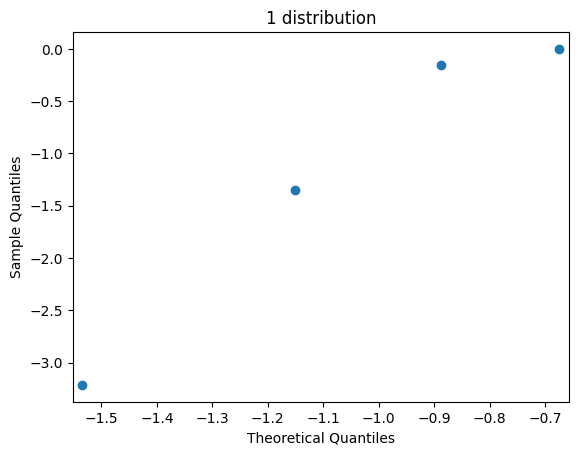

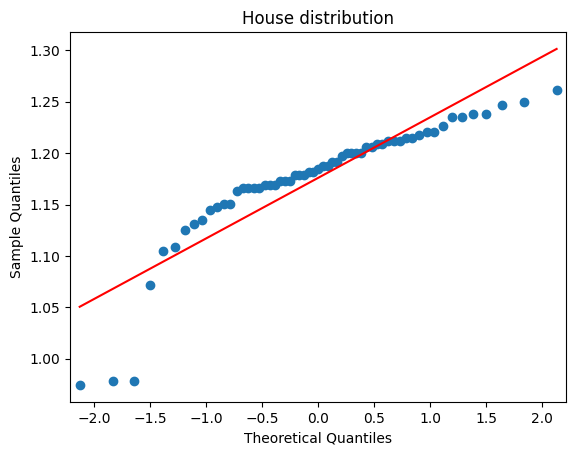

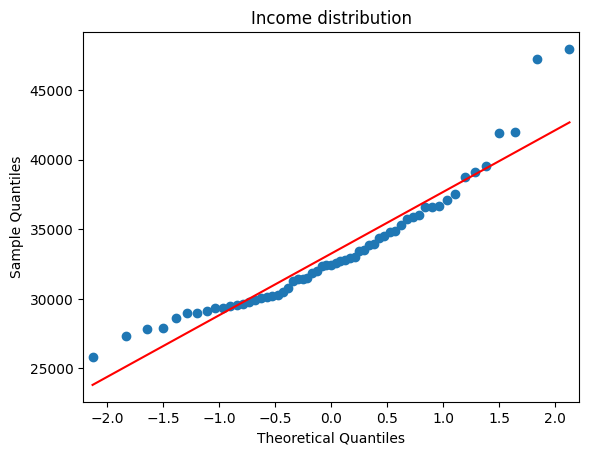

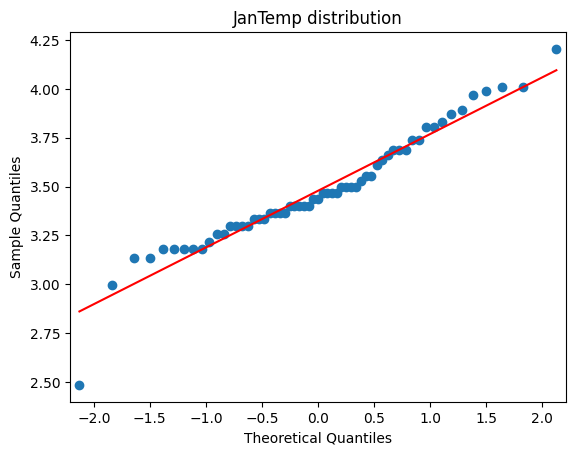

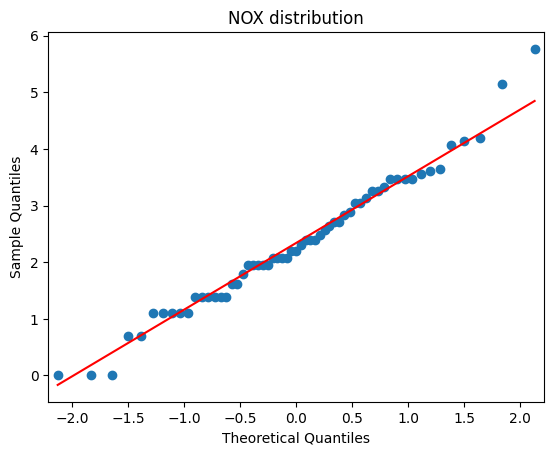

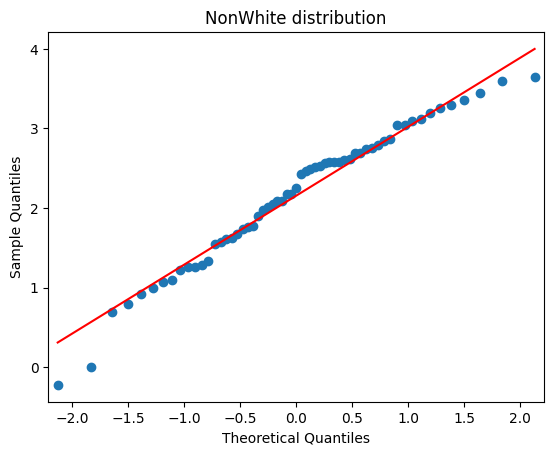

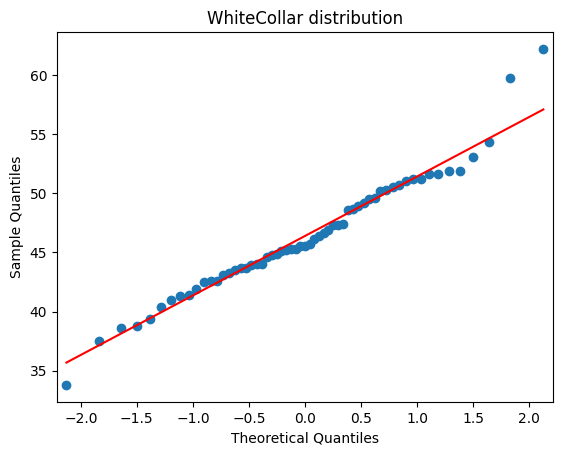

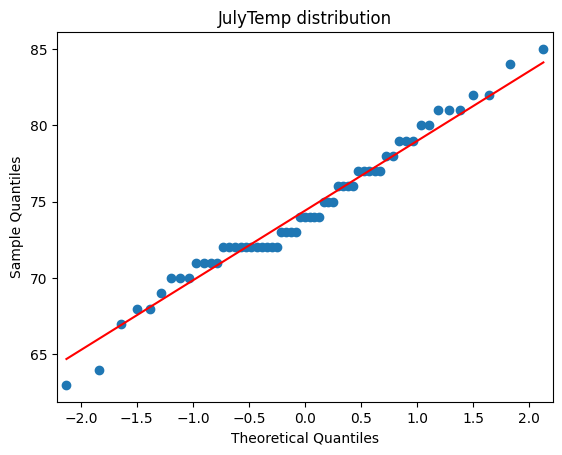

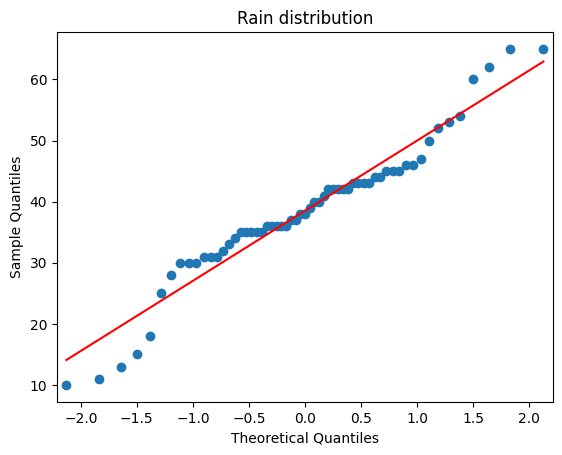

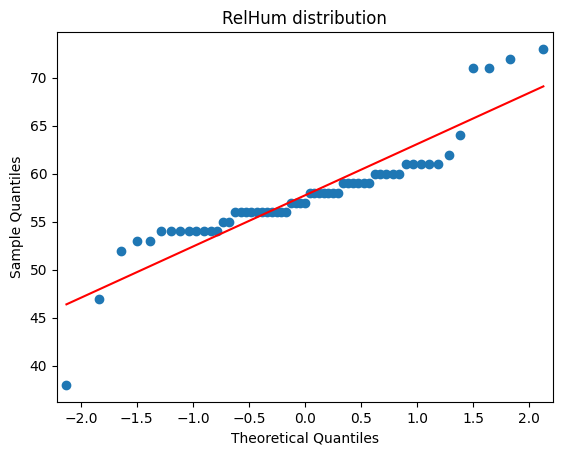

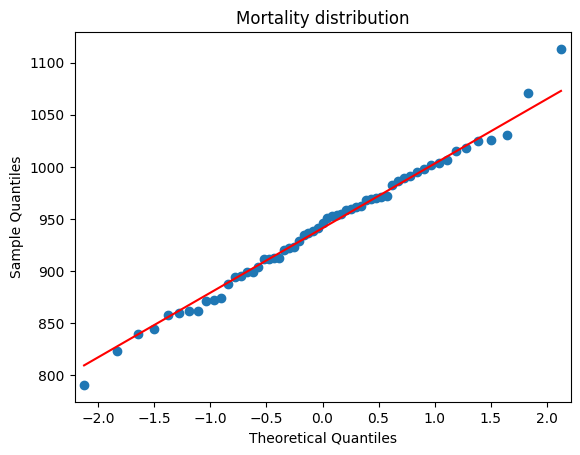

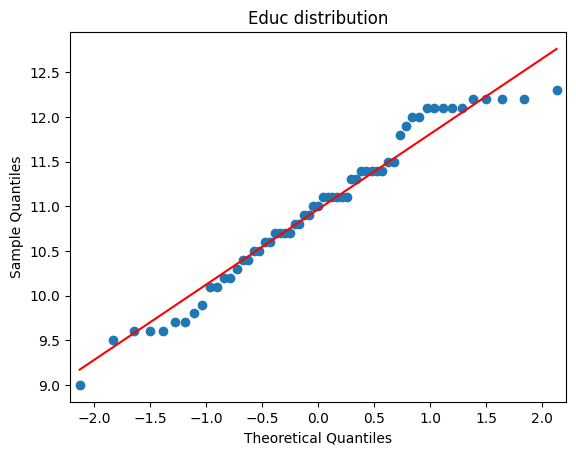

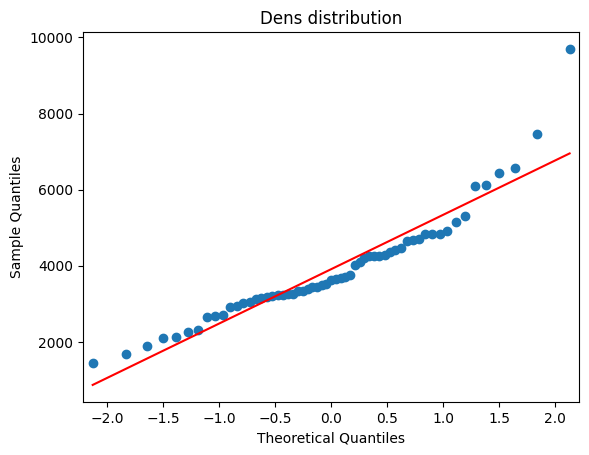

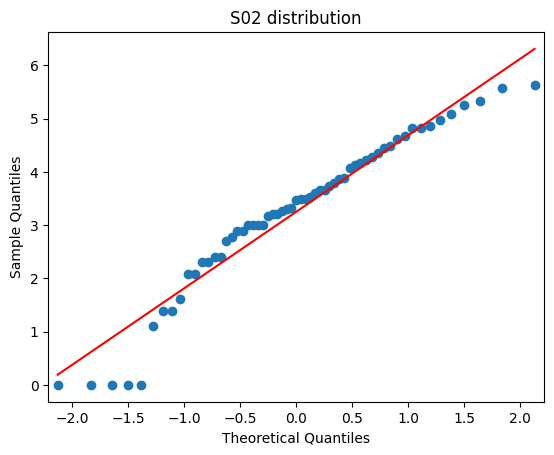

In [ ]:
#creating  q-q plots

import statsmodels.api as sm

sm.qqplot(x_rescale[:][1], line='s')
plt.title("1 distribution")
plt.show()


sm.qqplot(np.log(d_m['House']), line='s')
plt.title("House distribution")
plt.show()

sm.qqplot(d_m['Income'], line='s')
plt.title("Income distribution")
plt.show()

sm.qqplot(np.log(d_m['JanTemp']), line='s')
plt.title("JanTemp distribution")
plt.show()

sm.qqplot(np.log(d_m['NOx']), line='s')
plt.title("NOX distribution")
plt.show()

sm.qqplot(np.log(d_m['NonWhite']), line='s')
plt.title("NonWhite distribution")
plt.show()

sm.qqplot(d_m['WhiteCollar'], line='s')
plt.title("WhiteCollar distribution")
plt.show()

sm.qqplot(d_m['JulyTemp'], line='s')
plt.title("JulyTemp distribution")
plt.show()

sm.qqplot(d_m['Rain'], line='s')
plt.title("Rain distribution")
plt.show()

sm.qqplot(d_m['RelHum'], line='s')
plt.title("RelHum distribution")
plt.show()

sm.qqplot(d_m['Mortality'], line='s')
plt.title("Mortality distribution")
plt.show()

sm.qqplot(d_m['Educ'], line='s')
plt.title("Educ distribution")
plt.show()

sm.qqplot(d_m['Dens'], line='s')
plt.title("Dens distribution")
plt.show()

sm.qqplot(np.log(d_m['SO2']), line='s')
plt.title("S02 distribution")
plt.show()

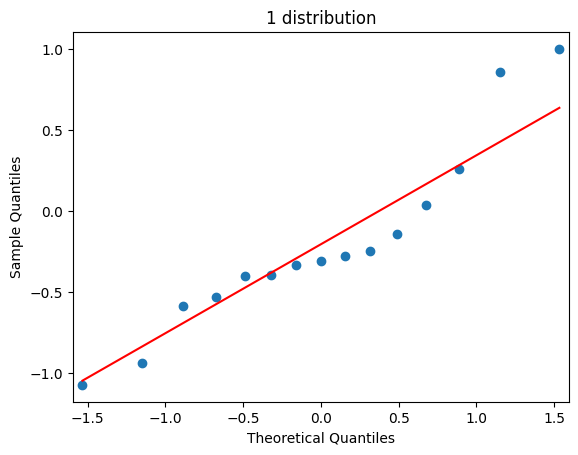

<ipython-input-9-f6ffe0bf9415>:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(x_rescale[:][2]), line='s')


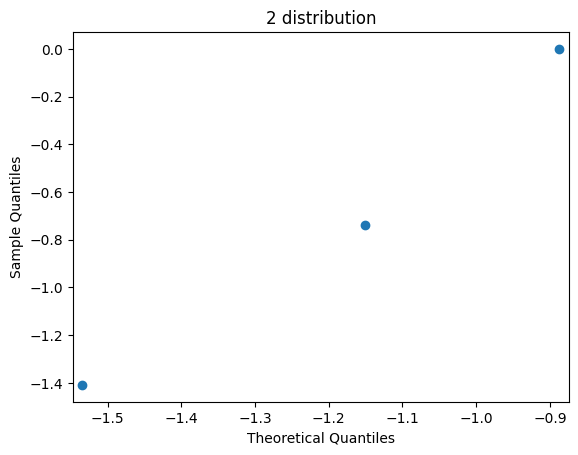

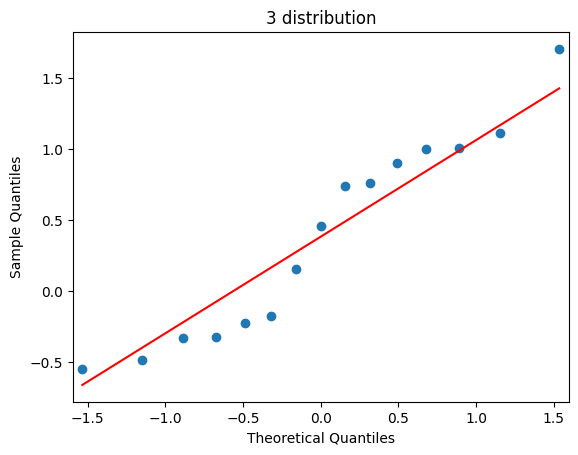

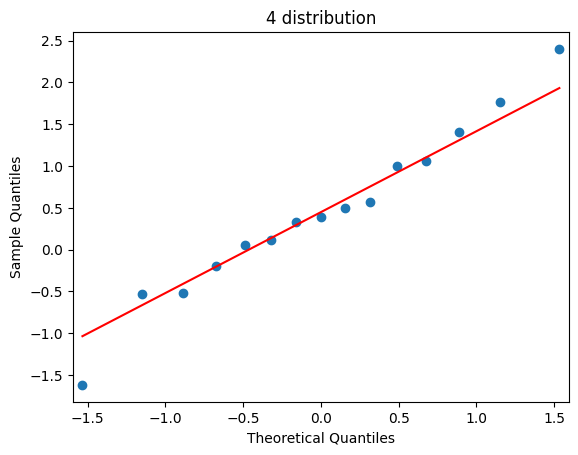

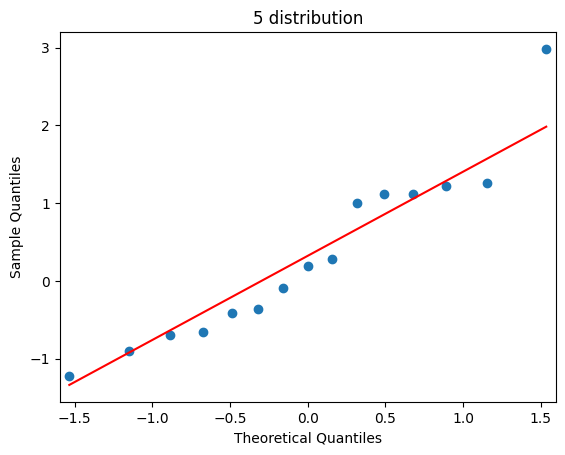

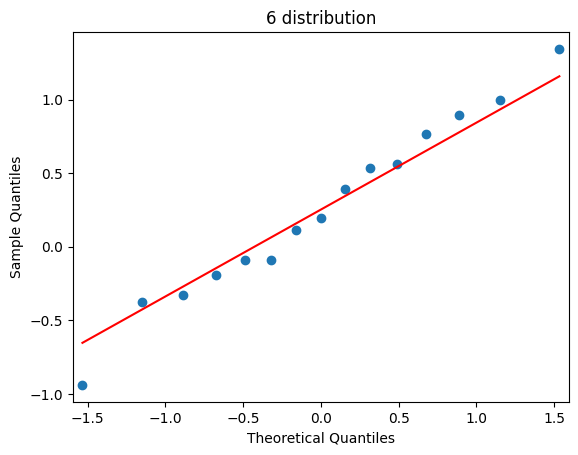

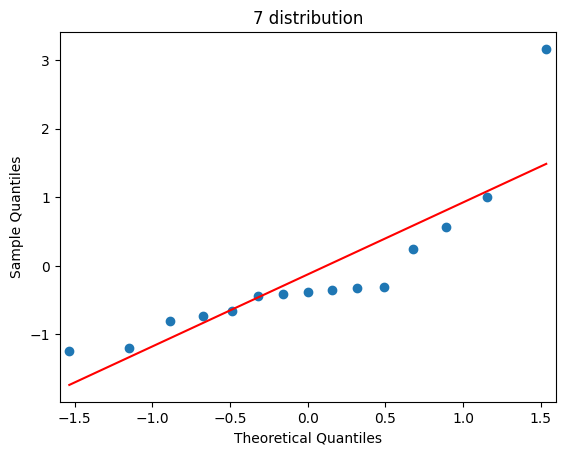

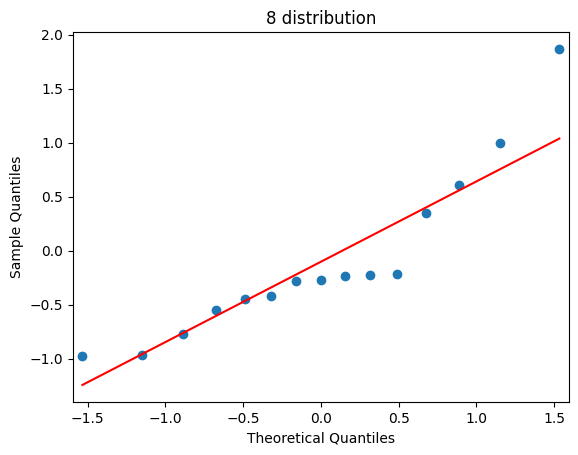

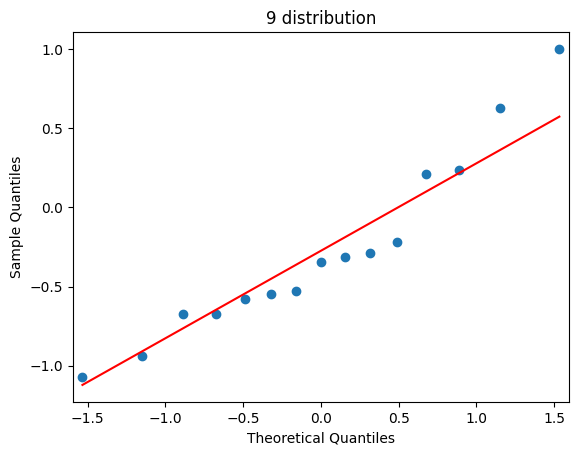

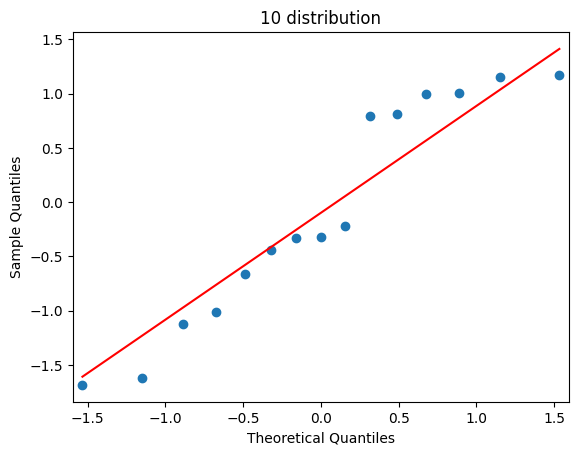

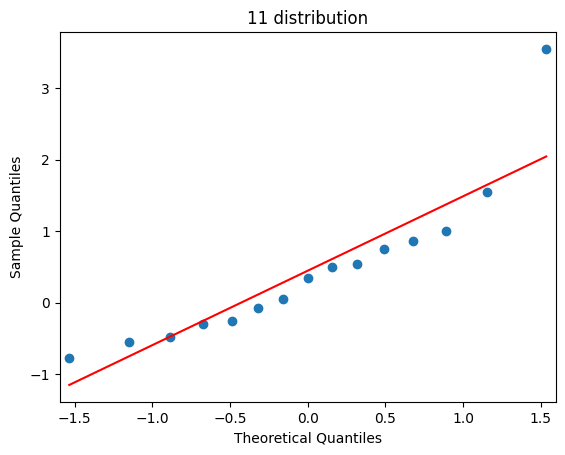

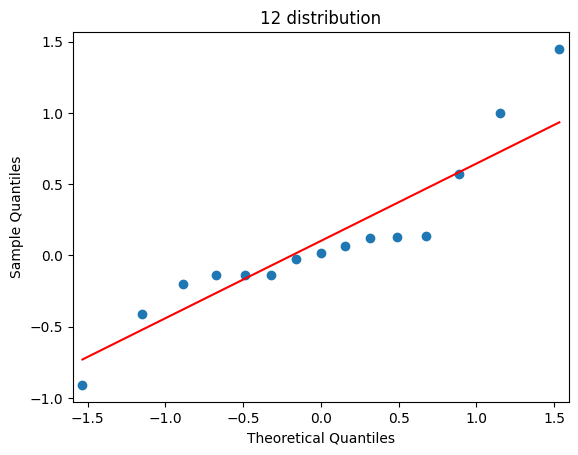

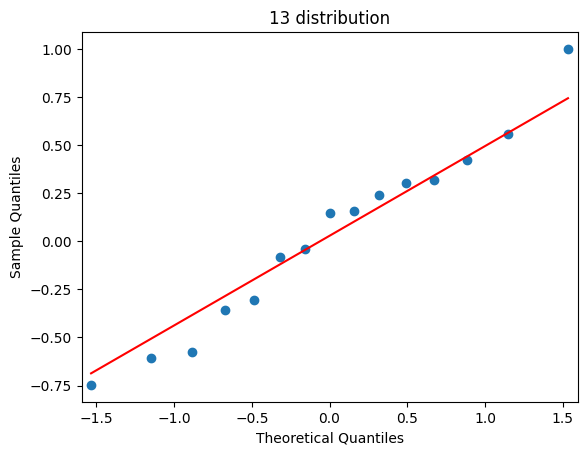

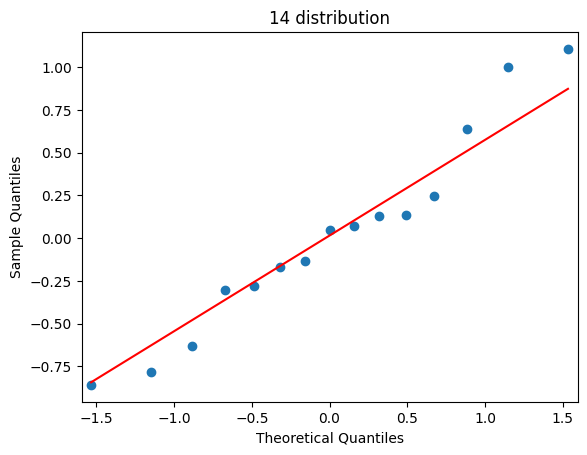

In [ ]:
import statsmodels.api as sm

sm.qqplot(x_rescale[:][1], line='s')
plt.title("1 distribution")
plt.show()

sm.qqplot(np.log(x_rescale[:][2]), line='s')
plt.title("2 distribution")
plt.show()
sm.qqplot(x_rescale[:][3], line='s')
plt.title("3 distribution")
plt.show()
sm.qqplot(x_rescale[:][4], line='s')
plt.title("4 distribution")
plt.show()
sm.qqplot(x_rescale[:][5], line='s')
plt.title("5 distribution")
plt.show()
sm.qqplot(x_rescale[:][6], line='s')
plt.title("6 distribution")
plt.show()
sm.qqplot(x_rescale[:][7], line='s')
plt.title("7 distribution")
plt.show()
sm.qqplot(x_rescale[:][8], line='s')
plt.title("8 distribution")
plt.show()
sm.qqplot(x_rescale[:][9], line='s')
plt.title("9 distribution")
plt.show()
sm.qqplot(x_rescale[:][10], line='s')
plt.title("10 distribution")
plt.show()
sm.qqplot(x_rescale[:][11], line='s')
plt.title("11 distribution")
plt.show()
sm.qqplot(x_rescale[:][12], line='s')
plt.title("12 distribution")
plt.show()
sm.qqplot(x_rescale[:][13], line='s')
plt.title("13 distribution")
plt.show()
sm.qqplot(x_rescale[:][14], line='s')
plt.title("14 distribution")
plt.show()

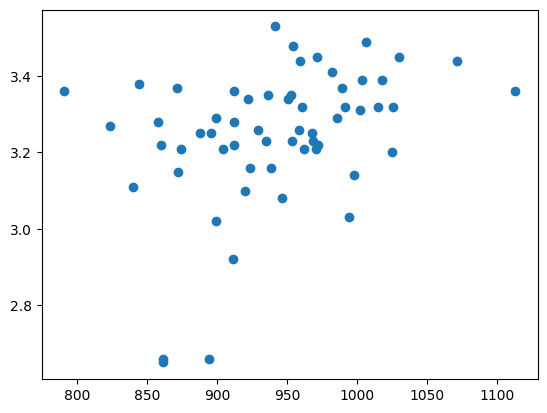

In [ ]:
plt.scatter(y, d_m['House'])
plt.show()

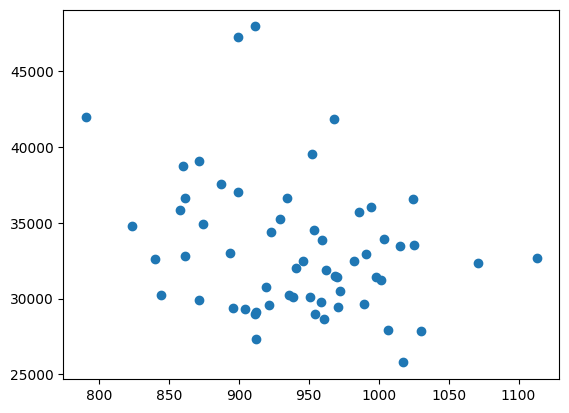

In [ ]:
plt.scatter(y, d_m['Income'])
plt.show()

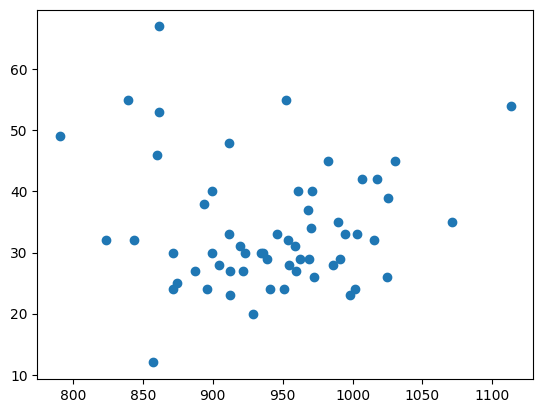

In [ ]:
plt.scatter(y, d_m['JanTemp'])
plt.show()

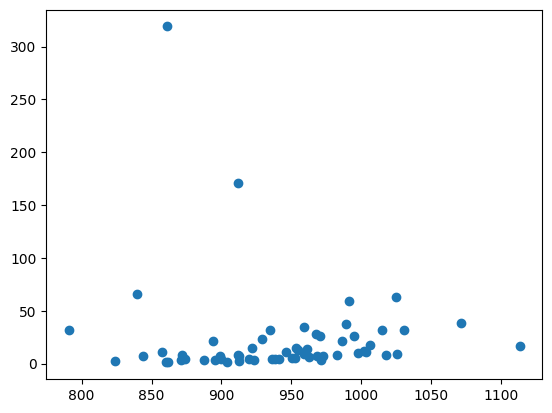

In [ ]:
plt.scatter(y, d_m['NOx'])
plt.show()

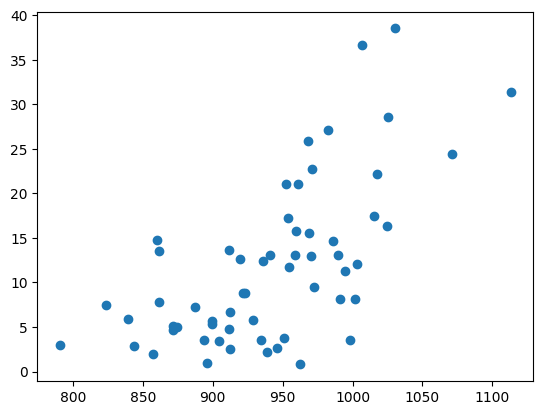

In [ ]:
plt.scatter(y, d_m['NonWhite'])
plt.show()

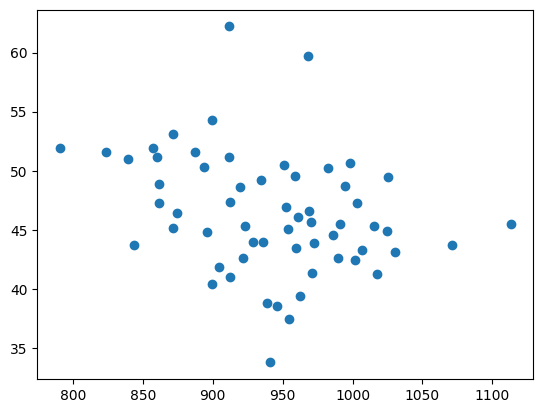

In [ ]:
plt.scatter(y, d_m['WhiteCollar'])
plt.show()

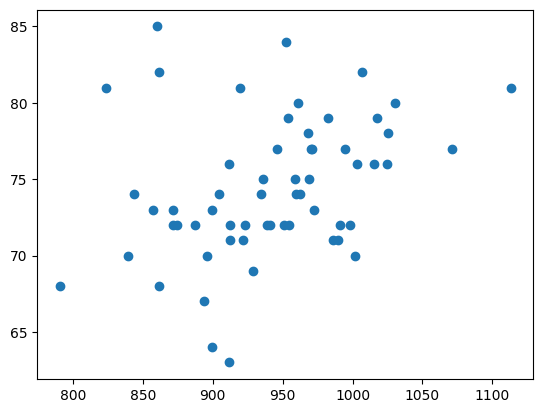

In [ ]:
plt.scatter(y, d_m['JulyTemp'])
plt.show()

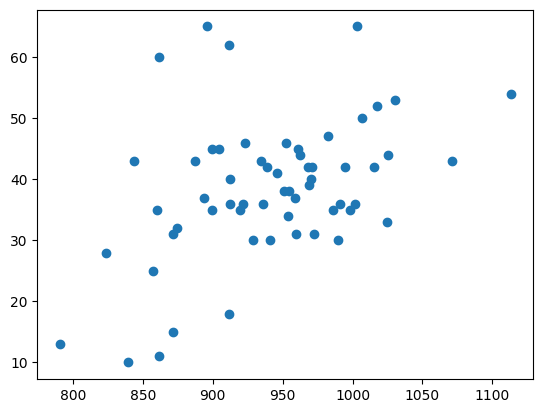

In [ ]:
plt.scatter(y, d_m['Rain'])
plt.show()

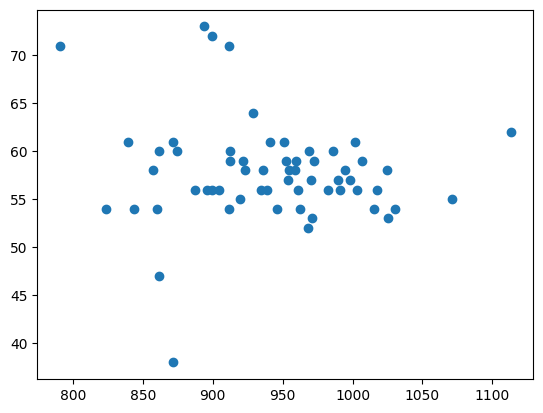

In [ ]:
plt.scatter(y, d_m['RelHum'])
plt.show()

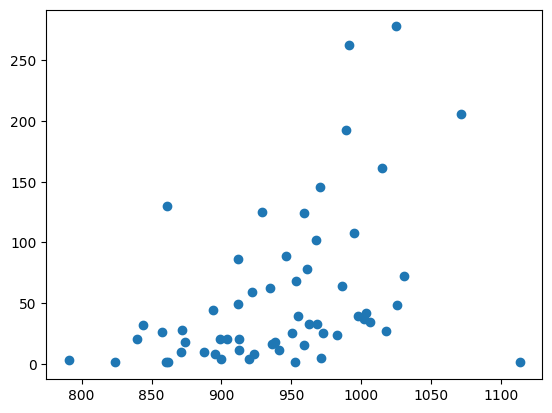

In [ ]:
plt.scatter(y, _m['Rain'])
plt.show()

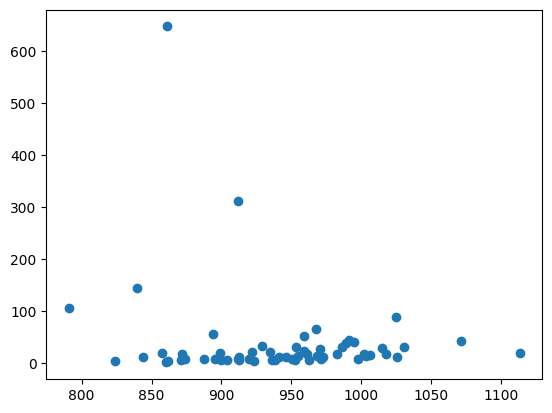